<a href="https://colab.research.google.com/github/arifai1/TP-Netflix/blob/main/TP_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABAJO PRACTICO NETFLIX**
Septiembre 2022

Integrantes =  Abril VB, Valentina H, Ari F, Sofia C 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [ ]:
df= pd.read_csv('NetflixHistory.csv')

Ignorar dispositivos

In [ ]:
devices = df['Device Type']
value_list = ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']
def valido(disp):
  return disp not in value_list

df = df[devices.apply(valido)]

## a) Contabilizar el dispositivo con el que más títulos se reprodujeron.






In [ ]:
#devices.value_counts()
devices.value_counts()
maxPro = devices.value_counts()
maxPro.iloc[0:1]

Apple Apple TV 4 Apple TV    3519
Name: Device Type, dtype: int64

### Funciones

In [ ]:
def withoutSVP(titles):
  return titles is np.NaN
dafr = df[df["Supplemental Video Type"].apply(withoutSVP)]

def soloSeries(titulo):
  return "Capítulo" in titulo
 
def soloPelis(titulo):
  return "Capítulo" not in titulo

def enSegundos(time):
  h, m, s = time.split(':')
  return int(h)*3600+int(m)*60+int(s)

peliculas = dafr[dafr['Title'].apply(soloPelis)]
series = dafr[dafr['Title'].apply(soloSeries)]
#df[df['Title'].apply(soloPelis)]


## b) Encontrar la película con más ocurrencias y la película con mayor duración total.

Mas ocurrencia

In [ ]:
maxOcu = peliculas['Title'].value_counts()
maxOcu.iloc[0:2]

Star Wars: El Imperio contraataca    7
El código enigma                     7
Name: Title, dtype: int64

Mayor duracion

In [ ]:
maxDura = peliculas.sort_values(by=['Duration'],ascending=False)
maxDura.filter(['Title','Duration']).iloc[0:1]

,Title,Duration
8127,El club de la pelea,02:20:11


## c) Generar un TOP “N” de series vistas y graficar.
### - Por tiempo visto




In [ ]:
ds = {}
res = {}
titulo = ''
n = 5

for i in series.index:
  titulo = (series['Title'][i].split(':'))[0]
  if titulo not in ds:
    ds[titulo] = enSegundos(series['Duration'][i])
  else:
    ds[titulo] += enSegundos(series['Duration'][i])

sortedDs = sorted(ds.items(), key = lambda a: a[1],reverse=True)
dfds = pd.DataFrame(sortedDs,columns= ['Series','Seconds Watched'])
dfds.iloc[0:n]

,Series,Seconds Watched
0,Cómo conocí a tu madre,816931
1,Community,807438
2,Friends,690936
3,La ley de los audaces,637377
4,Doctor Who,530325


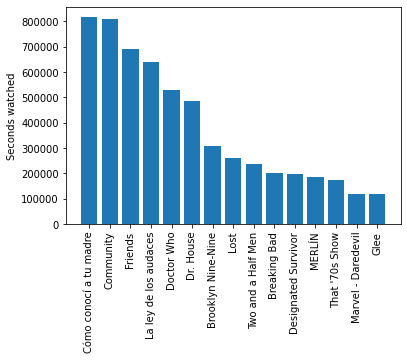

In [ ]:
for j in range(15):
  res[max(ds, key=ds.get)] = ds[max(ds, key=ds.get)]
  ds[max(ds, key=ds.get)] = 0
plt.bar(res.keys(), res.values())
plt.ylabel('Seconds watched')
plt.xticks(rotation = 90)
plt.show()

### - Por ocurrencias

In [ ]:
os = {}
titulo = ''
resO = {}
nO = 5

for i in series.index:
  titulo = (series['Title'][i].split(':'))[0]
  if titulo not in os:
    os[titulo] = 1
  else:
    os[titulo] += 1

sortedOs = sorted(os.items(), key = lambda a: a[1],reverse=True)
dfos = pd.DataFrame(sortedOs,columns= ['Series','Times Watched'])
dfos.iloc[0:n]

,Series,Times Watched
0,Community,870
1,Cómo conocí a tu madre,780
2,Friends,604
3,Dr. House,346
4,La ley de los audaces,330


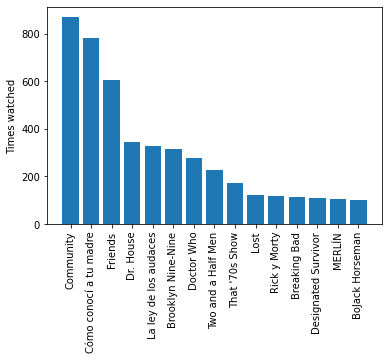

In [ ]:
for i in range(15):
  resO[max(os, key=os.get)] = os[max(os, key=os.get)]
  os[max(os, key=os.get)] = 0
plt.bar(resO.keys(), resO.values())
plt.ylabel('Times watched')
plt.xticks(rotation = 90)
plt.show()

## d)Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años del repo.

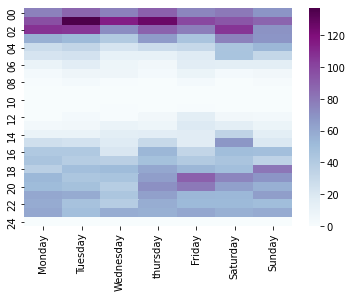

In [ ]:
horas = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09','10','11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'] #guardamos las horas
dias = ['Monday', 'Tuesday', 'Wednesday', 'thursday', 'Friday', 'Saturday', 'Sunday'] 
horas_dias = pd.DataFrame(index=horas, columns=dias)

for g in horas_dias.columns:
  horas_dias[g].values[:] = 0

for dia in df['Start Time']:
  week_day = (dia.split('-'))[0]+ '-' +(dia.split('-'))[1]+ '-' +((dia.split('-'))[2]).split()[0]
  week_day = datetime.strptime(week_day, "%Y-%m-%d")
  week_day = dias[week_day.weekday()]
  h = ((dia.split('-')[2]).split()[1]).split(':')[0]
  horas_dias[week_day][h] += 1

horas_dias = horas_dias.astype(np.float64)
ax = sns.heatmap(horas_dias, cmap='BuPu')

## e) Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.


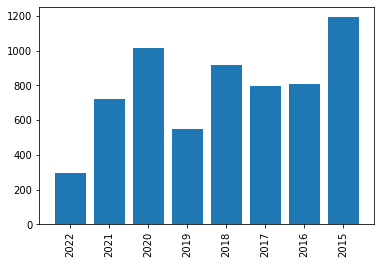

,Titles watched
2022,294
2021,722
2020,1016
2019,550
2018,916
2017,795
2016,807
2015,1191


In [ ]:
titulosXanios = {}
anios = ''

for title in df.index:
  anios = (df['Start Time'][title].split('-'))[0]
  if anios not in titulosXanios:
    titulosXanios[anios] = 1
  else:
    titulosXanios[anios] += 1

plt.bar(titulosXanios.keys(), titulosXanios.values())
plt.xticks(rotation = 90)
plt.show()
dfta= pd.DataFrame.from_dict(titulosXanios, orient='index', columns=['Titles watched'])
dfta

## f) Total de días de todos los títulos reproducidos.

In [ ]:
titles = df ["Duration"]
titlesDurationSeconds = titles.apply(enSegundos)
totalDias = int(titlesDurationSeconds.sum() / 86400)
print ("Total de dias de todos los titulos reproducidos " + str(totalDias))

Total de dias de todos los titulos reproducidos 99


Bonus: 

Identificar fue la película de Star Wars más veces vista por duración.
Utilizando la API de IMDb (u otra):
Mostrar el póster de las películas más vistas, y de las series.
Encontrar el género de series y el de películas más ocurrente.
Encontrar la serie que más rápido se terminó de ver.
